In [1]:
import os 
import pandas as pd
import numpy as np
import geopandas as gpd
import sys
from pyproj import Transformer
from shapely import Point, Polygon

transformer = Transformer.from_crs(4326, 3413, always_xy=True)

import matplotlib.pyplot as plt

from msc_thesis_functions import *
del sys.modules['msc_thesis_functions']
from msc_thesis_functions import *

path_qlook = '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/OIB/Quicklook'
files = os.listdir(path_qlook)


### First 2016... 

In [75]:
sites_2016 = ['grid3','grid4','grid5','grid6','grid7','grid8']
date = '20160419'

df_qlook = pd.read_csv(os.path.join(path_qlook,'IDCSI4_'+date+'.txt'), usecols=[0,1,2,3,4,5,6,7,8])
df_qlook = df_qlook.loc[df_qlook['snow_depth'] != -99999]
df_qlook.reset_index(drop=True, inplace=True)
df_qlook['x'], df_qlook['y'] = transformer.transform(df_qlook['lon'], df_qlook['lat'])  

path_to_shapes = '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/Eureka/grid_extents_v4'
shape_files = os.listdir(path_to_shapes)
shape_files = np.sort([f for f in shape_files if f.endswith('.shp') and date[:4] in f])
shape_dict = {}
p_in_poly = {}

for i, site in enumerate(sites_2016):
    outline = gpd.read_file(os.path.join(path_to_shapes,shape_files[i]))
    shape_dict[site] = outline
    
    points = [Point(x,y) for x,y in zip(df_qlook['x'],df_qlook['y'])] 
    p_in_poly[site] = points_in_poly_list(outline['geometry'], points)
    
    indices = [index for sublist in p_in_poly[site].values() for index in sublist]
    df_f = df_qlook.loc[indices]
    filename = f'subset/{site}_{date}_qlook.csv'
    df_f.to_csv(os.path.join(path_qlook,filename), index=False)
    
    

### ... then 2014

In [15]:
# sites_2014 = [2,3,4]
sites_2014 = ['transect']
date = '20140325'

df_qlook = pd.read_csv(os.path.join(path_qlook,'OIB_'+date+'_IDCSI2.txt'), usecols=[0,1,2,3,4,5,6,7,8])
df_qlook = df_qlook.loc[df_qlook['snow_depth'] != -99999]
df_qlook.reset_index(drop=True, inplace=True)
df_qlook['x'], df_qlook['y'] = transformer.transform(df_qlook['lon'], df_qlook['lat'])  

path_to_shapes = '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/Eureka/grid_extents_v4'
shape_files = os.listdir(path_to_shapes)
shape_files = np.sort([f for f in shape_files if f.endswith('.shp') and date[:4] in f])
shape_dict = {}
p_in_poly = {}

for i, site in enumerate(sites_2014):
    outline = gpd.read_file(os.path.join(path_to_shapes,shape_files[3]))
    shape_dict[site] = outline
    
    points = [Point(x,y) for x,y in zip(df_qlook['x'],df_qlook['y'])] 
    p_in_poly[site] = points_in_poly_list(outline['geometry'], points)
    
    indices = [index for sublist in p_in_poly[site].values() for index in sublist]
    df_f = df_qlook.loc[indices]
    filename = f'subset/{site}_{date}_qlook.csv'
    print(filename)
    df_f.to_csv(os.path.join(path_qlook,filename), index=False)
    
    

subset/transect_20140325_qlook.csv


In [14]:
shape_files

array(['EUREKA2014_2_measurement_bounds.shp',
       'EUREKA2014_3_measurement_bounds.shp',
       'EUREKA2014_4_measurement_bounds.shp',
       'EUREKA2014_transect_measurement_bounds.shp'], dtype='<U42')

In [7]:
%matplotlib widget

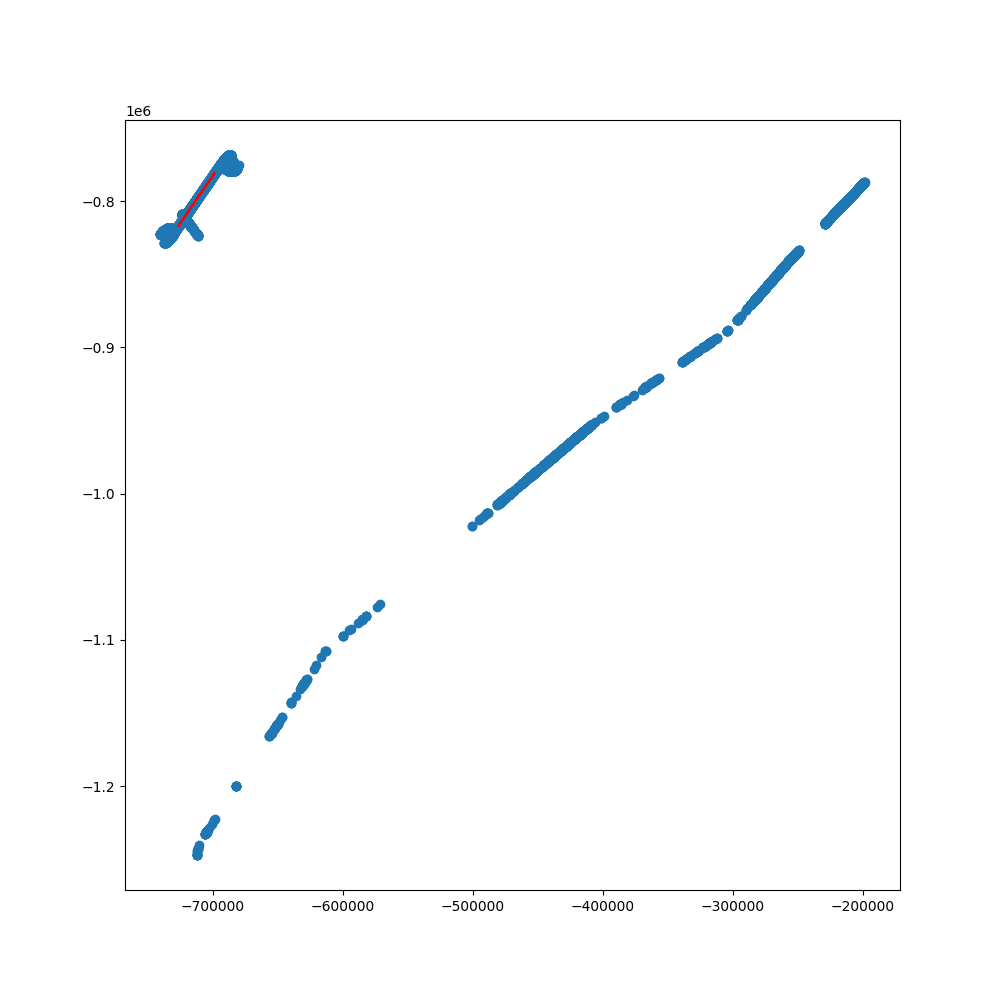

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(df_qlook['x'],df_qlook['y'])
ax.plot(*outline.loc[0,'geometry'].exterior.xy, color='red',zorder=100)